# Construcción y entrenamiento de una CNN

## Instalación e importado de librerías

Instalar librerias necesarias en entorno de colab (comentar si no es necesario o se cuenta con un entorno local virtual donde las librerias ya se encuentran instaladas)

In [53]:
!pip install tensorflow matplotlib numpy keras

Importado de librerías para uso dentro del código

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import datasets, layers, models
from keras.utils import to_categorical

## Carga y exploración del dataset CIFAR-10

Carga y serparación del dataset CIFAR-10 en conjuntos de entrenamiento y prueba pra las imágenes y etiquetas

In [55]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Exploración de los datos por cada conjuto de pruebas

In [56]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [57]:
print("Dimensiones de las imágenes de entrenamiento:", train_images.shape)
print("Dimensiones de las etiquetas de entrenamiento:", train_labels.shape)
print("Dimensiones de las imágenes de prueba:", test_images.shape)
print("Dimensiones de las etiquetas de prueba:", test_labels.shape)

Dimensiones de las imágenes de entrenamiento: (50000, 32, 32, 3)
Dimensiones de las etiquetas de entrenamiento: (50000, 1)
Dimensiones de las imágenes de prueba: (10000, 32, 32, 3)
Dimensiones de las etiquetas de prueba: (10000, 1)


> Para los conjuntos de imágenes los valores representan: \
  50000-10000: Cantidad de imágenes. \
  32, 32: Ancho y alto de los pixeles por imágen. \
  3: Número de canales de colores por imagen (RGB).


> Para los conjuntos de etiquetas: \
  50000-10000: Cantidad de imágenes. \
  1: Cantidad de lineas por archivo

Visualización de imagenes en conjuntos con matplotlib

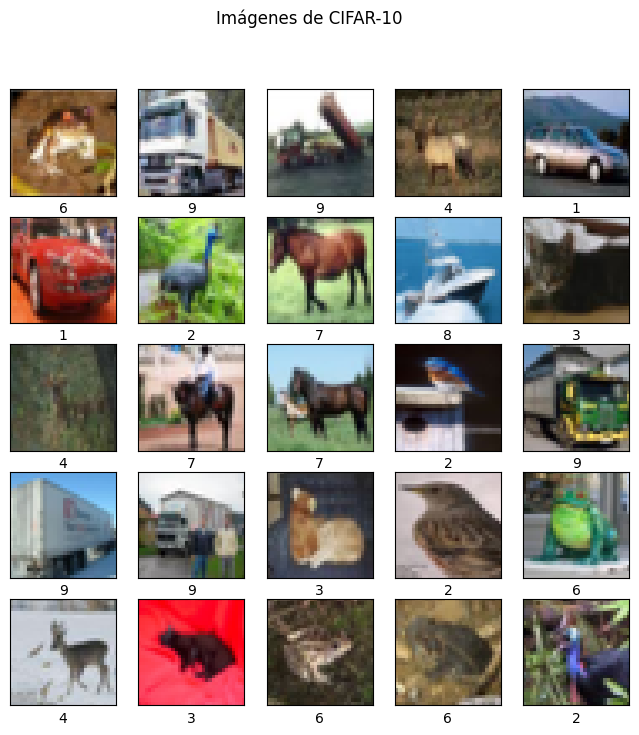

In [58]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i][0])
plt.suptitle("Imágenes de CIFAR-10")
plt.show()



> NOTA!: \
  ¿Cuál es el tamaño de las imágenes en CIFAR-10? 32x32 \
  ¿Cuántas clases hay y cómo están representadas? 10 y valores del 0 al 9 \
  ¿Cómo se almacenan las etiquetas y en qué formato? En arreglos de números enteros




---

## Procesado de datos

Normalización de las imágenes

In [59]:
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

Etiquetas convertidas con one-hot encoding

In [60]:
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

> NOTA: \
  ¿Por qué es importante normalizar las imágenes antes de entrenar el modelo? Eficienta la utilización de recursos al entrenar el modelo.

---

## Construcción y entrenamiento del modelo

Creación de un modelo plano sin configuración

In [61]:
model = models.Sequential()

Primera capa convolucional: 32 filtros de 3x3, función de activación ReLU


In [62]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

Segunda capa convolucional y capa de max pooling


In [63]:
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

Capa de Dropout para reducir el sobreajuste

In [64]:
model.add(layers.Dropout(0.25))

Segunda bloque convolucional: 64 filtros

In [65]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

Capa de salida: 10 neuronas (una por clase) con softmax para clasificación multiclase


In [66]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

Mostrar la estructura del modelo

In [67]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 890,410 (3.40 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

> NOTA: Las capas necesarias para entrenar depende de la cantidad de los datos, y el tipo de clasificación es lo que dara pie a la activación. \
Filtros de 3 x 3 y 32 por la resolución de imagenes.\
Aplanando la salida de la red.

Compilación del modelo con un optimizador ADAM y una perdida por categorical cross entropy, con fijación en el accuracy del modelo

In [68]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Entrenamiento del modelo con 25 epocas, 64 en el batch size y una validación del 0.2

In [69]:
history = model.fit(train_images, train_labels_cat,
                    epochs=25,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2898 - loss: 1.9024 - val_accuracy: 0.4967 - val_loss: 1.3808
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5145 - loss: 1.3484 - val_accuracy: 0.5790 - val_loss: 1.1850
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5897 - loss: 1.1549 - val_accuracy: 0.6609 - val_loss: 0.9654
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6355 - loss: 1.0322 - val_accuracy: 0.6866 - val_loss: 0.8999
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6639 - loss: 0.9518 - val_accuracy: 0.7106 - val_loss: 0.8223
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6910 - loss: 0.8791 - val_accuracy: 0.7028 - val_loss: 0.8479
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7096 - loss: 0.8330 - val_accuracy: 0.7303 - val_loss: 0.7907
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7310 - loss: 0.7735 - val_accuracy: 0.

Evaluación de la perdida del modelo

In [70]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print("Precisión en test:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7780 - loss: 0.6674
Precisión en test: 0.7731999754905701


In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

Text(0.5, 1.0, 'Precisión durante el entrenamiento')

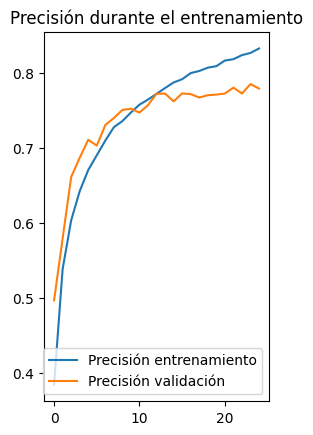

In [72]:
# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Precisión entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión validación')
plt.legend(loc='lower right')
plt.title('Precisión durante el entrenamiento')

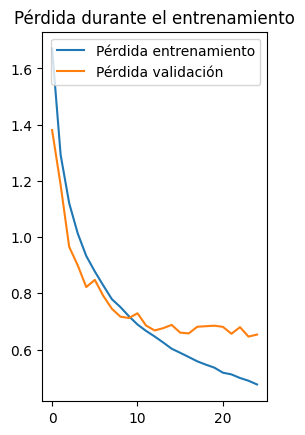

In [73]:
# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Pérdida entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida validación')
plt.legend(loc='upper right')
plt.title('Pérdida durante el entrenamiento')

plt.show()

> Si el modelo tiene alta precisión en entrenamiento pero baja en test, es posible que esté sobreajustado, lo que significa que ha aprendido demasiado las particularidades de los datos de entrenamiento y no generaliza bien.